In [173]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [174]:
df = pd.read_csv("HR_comma_sep.csv")

In [175]:
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [176]:
df.tail(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14989,0.43,0.57,2,159,3,1,1,0,technical,low
14990,0.89,0.88,5,228,5,1,1,0,support,low
14991,0.09,0.81,6,257,4,0,1,0,support,low
14992,0.40,0.48,2,155,3,0,1,0,support,low
14993,0.76,0.83,6,293,6,0,1,0,support,low
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [178]:
import pandas as pd

# Load your dataset
df = pd.read_csv('HR_comma_sep.csv')

# Check for missing values
print(df.isnull().sum())


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


                 Feature  Importance
0     satisfaction_level    0.337803
2         number_project    0.192853
4     time_spend_company    0.179340
3   average_montly_hours    0.143251
1        last_evaluation    0.119919
7             Department    0.011823
8                 salary    0.008138
5          Work_accident    0.005976
6  promotion_last_5years    0.000896


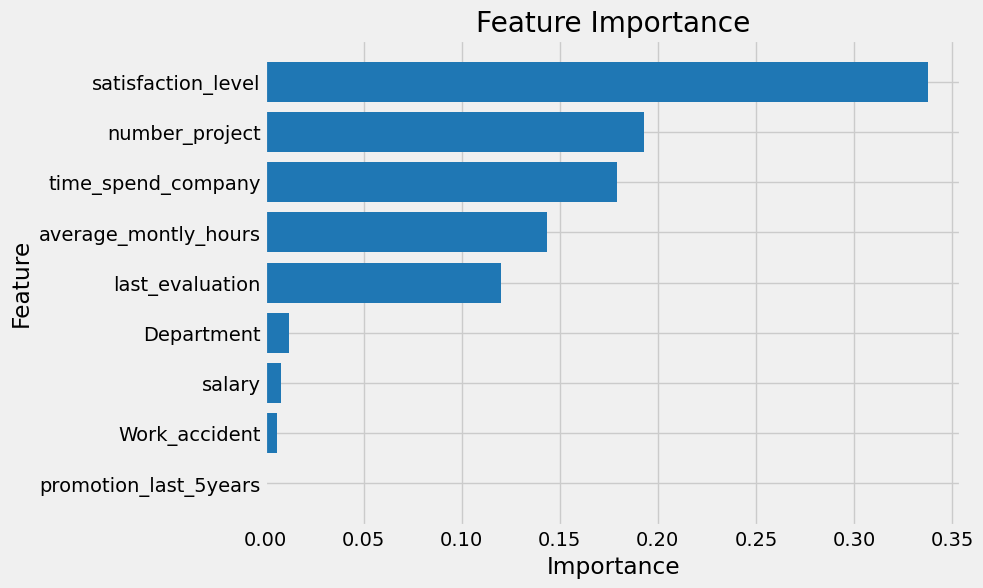

In [179]:
# Display the feature importance using print
print(feature_importance_df)

# Alternatively, we can plot the feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='#1f77b4')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()


In [182]:
df.shape

(14999, 10)

In [183]:
# Perform correlation analysis
# First, we need to convert the categorical columns to numeric values for correlation analysis.
# We'll use one-hot encoding for 'Department' and 'salary' columns.
hr_data_encoded = pd.get_dummies(hr_data, columns=['Department', 'salary'], drop_first=True)

# Calculate the correlation matrix
correlation_matrix = hr_data_encoded.corr()

# Extract the correlation of each feature with the target variable 'left'
correlation_with_left = correlation_matrix['left'].sort_values(ascending=False)

# Display the correlation values with 'left'
correlation_with_left


left                      1.000000
time_spend_company        0.144822
salary_low                0.134722
average_montly_hours      0.071287
Department_hr             0.028249
number_project            0.023787
Department_technical      0.020076
Department_accounting     0.015201
Department_support        0.010700
Department_sales          0.009923
last_evaluation           0.006567
Department_marketing     -0.000859
Department_product_mng   -0.011029
Department_management    -0.046035
Department_RandD         -0.046596
promotion_last_5years    -0.061788
salary_medium            -0.068833
Work_accident            -0.154622
satisfaction_level       -0.388375
Name: left, dtype: float64

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Preparing the data for the model
# The target is 'left' and the features are the rest of the columns
X = hr_data_encoded.drop('left', axis=1)
y = hr_data_encoded['left']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep


(0.9724444444444444,
 '              precision    recall  f1-score   support\n\n           0       0.98      0.99      0.98      3428\n           1       0.96      0.92      0.94      1072\n\n    accuracy                           0.97      4500\n   macro avg       0.97      0.95      0.96      4500\nweighted avg       0.97      0.97      0.97      4500\n')

In [186]:
import pandas as pd

# Load the dataset
file_path = 'HR_comma_sep.csv'
df = pd.read_csv(file_path)

# Filter retained employees (those who haven't left, i.e., left == 0)
retained_employees = df[df['left'] == 0]

# Calculate average satisfaction level
avg_satisfaction_level = retained_employees['satisfaction_level'].mean()

# Calculate average monthly hours
avg_monthly_hours = retained_employees['average_montly_hours'].mean()

# Calculate average time spent in company
avg_time_spend_company = retained_employees['time_spend_company'].mean()

# Calculate the percentage of retained employees who had a work accident
work_accident_rate = retained_employees['Work_accident'].mean() * 100

# Calculate the percentage of retained employees who were promoted in the last 5 years
promotion_rate = retained_employees['promotion_last_5years'].mean() * 100

# Display the insights
print("Insights from Retained Employees:")
print(f"Average Satisfaction Level: {avg_satisfaction_level:.2f}")
print(f"Average Monthly Hours: {avg_monthly_hours:.2f}")
print(f"Average Time Spent in Company (years): {avg_time_spend_company:.2f}")
print(f"Work Accident Rate: {work_accident_rate:.2f}%")
print(f"Promotion Rate in Last 5 Years: {promotion_rate:.2f}%")


Insights from Retained Employees:
Average Satisfaction Level: 0.67
Average Monthly Hours: 199.06
Average Time Spent in Company (years): 3.38
Work Accident Rate: 17.50%
Promotion Rate in Last 5 Years: 2.63%


In [187]:
dept_dt = pd.crosstab(df.Department, df.left)
labels = dept_dt.index.tolist()
print(labels)
x_ticks = np.arange(len(labels))
print(x_ticks)
dept_dt

['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing', 'product_mng', 'sales', 'support', 'technical']
[0 1 2 3 4 5 6 7 8 9]


left,0,1
Department,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


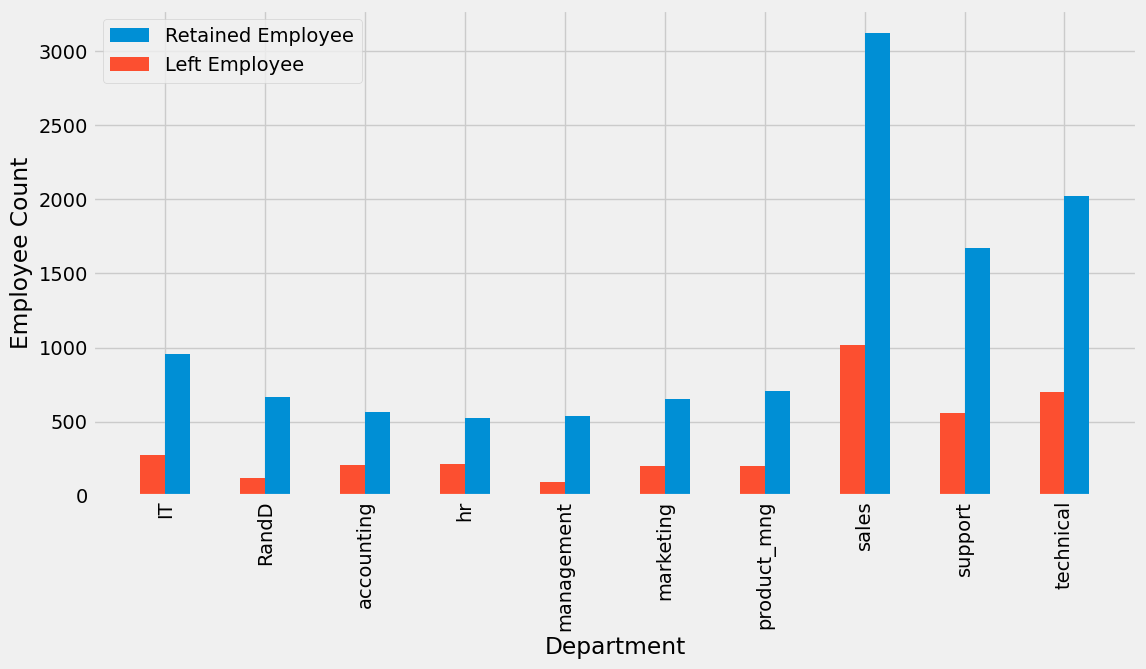

In [188]:
bar_width = 0.25
plt.bar(x_ticks + bar_width/2, dept_dt[0], width=bar_width, label='Retained Employee')
plt.bar(x_ticks - bar_width/2, dept_dt[1], width=bar_width, label='Left Employee')
# plt.bar(labels, dt[0])
plt.xticks(x_ticks, labels, rotation='vertical')
plt.xlabel('Department')
plt.ylabel('Employee Count')
plt.legend()

In [189]:
c_df = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary', 'left']] # Chosen Dataframe from given data
c_df

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left
0,0.38,157,0,low,1
1,0.80,262,0,medium,1
2,0.11,272,0,medium,1
3,0.72,223,0,low,1
4,0.37,159,0,low,1
...,...,...,...,...,...
14994,0.40,151,0,low,1
14995,0.37,160,0,low,1
14996,0.37,143,0,low,1
14997,0.11,280,0,low,1


In [191]:
ohe = OneHotEncoder()
encoded_column = ohe.fit_transform(c_df[['salary']])
encoded_df = pd.DataFrame(encoded_column.toarray(), columns=ohe.get_feature_names_out(['salary']))
encoded_df = pd.concat((c_df, encoded_df), axis=1)

# Drop salary and salary_high to escape dummy variable trap
encoded_df = encoded_df.drop(['salary', 'salary_high'], axis=1)
encoded_df

,satisfaction_level,average_montly_hours,promotion_last_5years,left,salary_low,salary_medium
0,0.38,157,0,1,1.0,0.0
1,0.80,262,0,1,0.0,1.0
2,0.11,272,0,1,0.0,1.0
3,0.72,223,0,1,1.0,0.0
4,0.37,159,0,1,1.0,0.0
...,...,...,...,...,...,...
14994,0.40,151,0,1,1.0,0.0
14995,0.37,160,0,1,1.0,0.0
14996,0.37,143,0,1,1.0,0.0
14997,0.11,280,0,1,1.0,0.0


In [192]:
X=encoded_df.drop(['left'], axis=1).values
y=encoded_df['left'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [193]:
model = LogisticRegression()
model.fit(X_train, y_train)
print(f'Model Accuracy: {model.score(X_test, y_test) * 100}%')

Model Accuracy: 77.4%


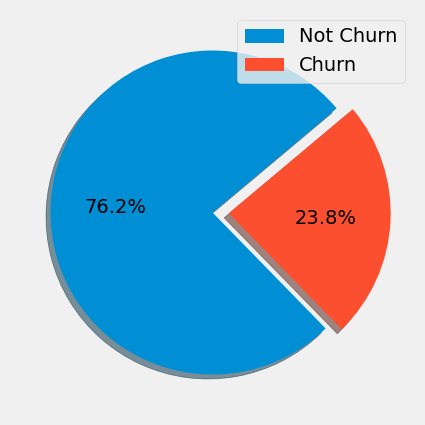

In [195]:
plt.figure(figsize=(6,5))
plt.pie(df.left.value_counts(),explode=[0,0.1],startangle=40,autopct='%1.1f%%',shadow=True)
plt.legend(labels=['Not Churn','Churn'],loc='upper right')
plt.show()

C:\Users\bstafford\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


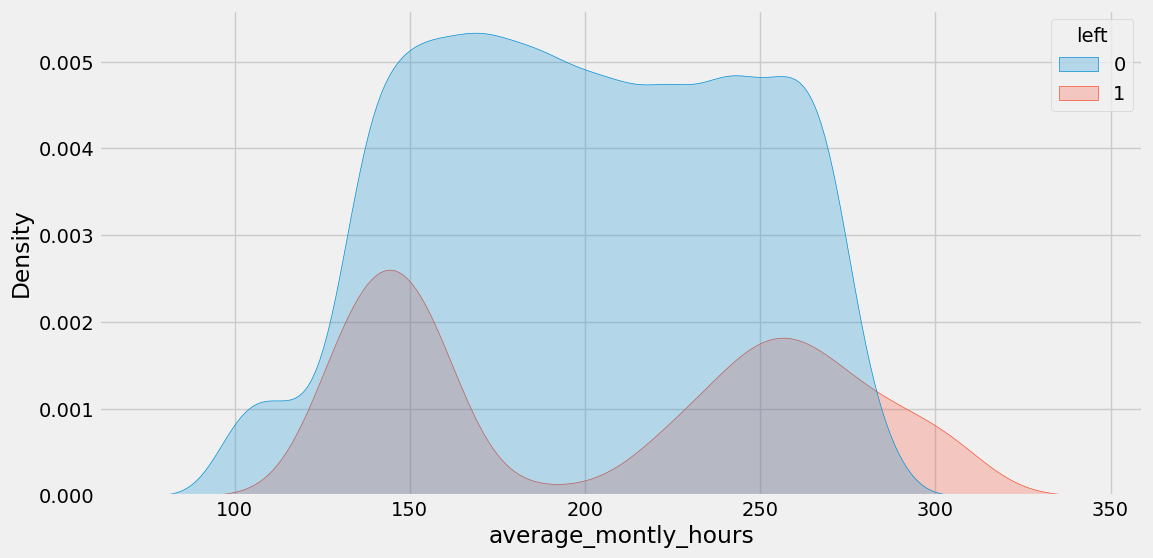

In [204]:
sns.kdeplot(data=df, x='average_montly_hours', hue='left', fill=True)
df.replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\bstafford\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


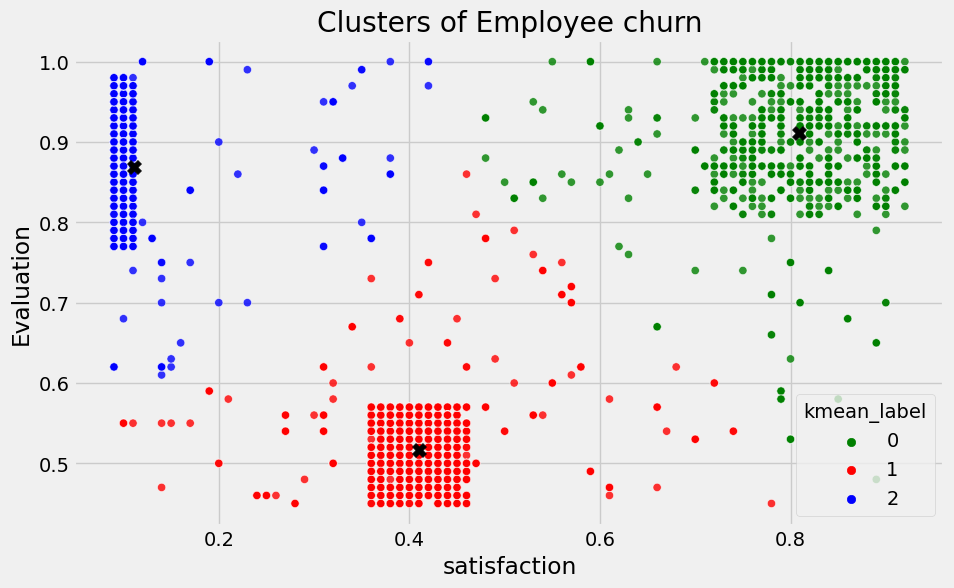

In [202]:
df1=df[df.left==1].copy()
kmeans = KMeans(n_clusters=3,random_state=2)
df1['kmean_label']=kmeans.fit_predict(df1[["satisfaction_level","last_evaluation"]])

fig = plt.figure(figsize=(10, 6))
sns.scatterplot(x='satisfaction_level',y='last_evaluation',data=df1,
                hue='kmean_label',palette=['g','r','b'],alpha=0.8)
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],
            color="black",marker="X",s=100)
plt.xlabel("satisfaction")
plt.ylabel("Evaluation")
plt.title("Clusters of Employee churn")
plt.show()



#To summarize:

#Green (Cluster 0): High satisfaction and high performance.
#Red (Cluster 1): Low satisfaction and low performance.
#Blue (Cluster 2): High performance but low satisfaction.

In [ ]:
#Recommendation: I would recommend focusing on the Blue Group (Cluster 2)—the employees with high evaluation scores but low satisfaction levels. 

# Why:

# 1. High Performers: These employees are likely valuable to the company because of their strong performance. 
#      They are contributing significantly, and losing them would have a larger impact on productivity and team morale.

#2. Dissatisfaction: Despite their good performance, they are unhappy in their roles. 
#     This combination of high performance and low satisfaction can be dangerous because they may feel underappreciated, overworked, or frustrated with certain aspects of the job, which could lead to them leaving.

# 3. Retention Potential: Because they are already performing well, addressing their dissatisfaction could significantly improve their retention. 
#     By understanding their concerns—whether it's related to work-life balance, recognition, compensation, or growth opportunities—you have a better chance of retaining these high-value employees with targeted interventions.

#  CLOSING: Focusing on this group can provide a high return on investment since you can retain talented employees 
##   by addressing their pain points and potentially prevent costly turnover.

In [ ]:
# DEEP DIVE

#The Red Group (Cluster 1)—employees with low satisfaction and low performance—would be the second most important group to address. Here’s why:

# 1. High Risk of Churn: These employees are likely the most dissatisfied and underperforming, which puts them at a very high risk of leaving the company. 
#    While their performance may not be as strong as other groups, turnover in this group could still be disruptive, especially if it's widespread.

#  2. Potential for Improvement: If you can identify the reasons for their dissatisfaction and underperformance,
#  there may be opportunities to turn things around. For example, they might need more training,
#  better management, clearer goals, or a more supportive work environment. Addressing these issues could improve both their job satisfaction and performance.

#3.     Cost of Inaction: If this group is left unchecked, even though they are underperforming, 
#      turnover could become costly if you have to recruit, hire, and train replacements. 
#    High turnover in this group could also negatively impact team dynamics and overall morale.

# Close:  Addressing this group could help reduce overall churn and boost company culture,
#   while offering an opportunity to uplift performance through targeted interventions. 
#  However, the priority would be slightly lower than the high-performing but dissatisfied Blue Group since improving performance 
#   and satisfaction with the Red Group may require more effort.